In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
data = np.genfromtxt(r'C:\Users\Dell\Desktop\ML Lab\data_banknote_authentication.txt', delimiter = ',')
X = data[:,:4]
y = data[:, 4]

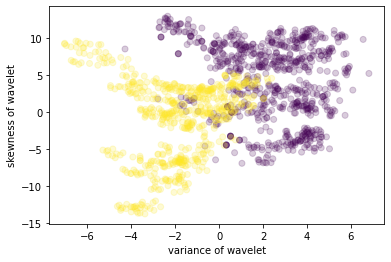

In [8]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2,
 c=y, cmap='viridis')
plt.xlabel('variance of wavelet')
plt.ylabel('skewness of wavelet');

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])

X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

print ('Train X Shape:', X_train.shape)
print ('Train Y Shape:', y_train.shape)
print (' %d training examples!' % (X_train.shape[1]))

print ('\nTest X Shape: ', X_test.shape)

Train X Shape: (4, 1097)
Train Y Shape: (1, 1097)
 1097 training examples!

Test X Shape:  (4, 275)


In [12]:
def define_structure(X, Y):
    input_unit = X.shape[0] # size of input layer
    hidden_unit = 4 #hidden layer of size 4
    output_unit = Y.shape[0] # size of output layer
    return (input_unit, hidden_unit, output_unit)

(input_unit, hidden_unit, output_unit) = define_structure(X_train, y_train)

print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))

The size of the input layer is:  = 4
The size of the hidden layer is:  = 4
The size of the output layer is:  = 1


In [13]:
def parameters_initialization(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

In [15]:
def cross_entropy_cost(A2, Y, parameters):
    # number of training example
    m = Y.shape[1] 
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
                                    
    return cost

In [16]:
def backward_propagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

In [17]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

In [18]:
def neural_network_model(X, Y, hidden_unit, num_iterations = 1000):
    np.random.seed(3)
    input_unit = define_structure(X, Y)[0]
    output_unit = define_structure(X, Y)[2]
    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = cross_entropy_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters
parameters = neural_network_model(X_train, y_train, 4, num_iterations=1000)

Cost after iteration 0: 0.692975
Cost after iteration 5: 0.692665
Cost after iteration 10: 0.692351
Cost after iteration 15: 0.692028
Cost after iteration 20: 0.691692
Cost after iteration 25: 0.691338
Cost after iteration 30: 0.690962
Cost after iteration 35: 0.690557
Cost after iteration 40: 0.690117
Cost after iteration 45: 0.689636
Cost after iteration 50: 0.689107
Cost after iteration 55: 0.688521
Cost after iteration 60: 0.687873
Cost after iteration 65: 0.687152
Cost after iteration 70: 0.686352
Cost after iteration 75: 0.685463
Cost after iteration 80: 0.684477
Cost after iteration 85: 0.683388
Cost after iteration 90: 0.682187
Cost after iteration 95: 0.680866
Cost after iteration 100: 0.679420
Cost after iteration 105: 0.677843
Cost after iteration 110: 0.676127
Cost after iteration 115: 0.674268
Cost after iteration 120: 0.672259
Cost after iteration 125: 0.670096
Cost after iteration 130: 0.667773
Cost after iteration 135: 0.665286
Cost after iteration 140: 0.662629
Cost af

In [19]:
def prediction(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [20]:
predictions = prediction(parameters, X_train)
print ('Accuracy Train: %d' % float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T))/
                                    float(y_train.size)*100) + '%')

predictions = prediction(parameters, X_test)
print ('Accuracy Test: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/
                                   float(y_test.size)*100) + '%')

Accuracy Train: 97%
Accuracy Test: 96%
